# **SMS Spam Detection**

## *Import Dataset and Data cleaning*

First we have to import the dataset. The dataset is composed of 5548 SMS.

In [2]:
import os
import nltk
import pandas as pd
import string
import matplotlib.pyplot as plt

In [3]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\39349\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\39349\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\39349\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
punctuations = list(string.punctuation)
stopwords = set(nltk.corpus.stopwords.words('english'))
stemmer = nltk.PorterStemmer()
names = ['punctuations', 'stopwords', 'stemmer']
objs = [punctuations, stopwords, stemmer]
for name, obj in zip(names, objs):
    print(name, obj)
    print()

punctuations ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

stopwords {'so', 't', 'both', 'more', 'same', 'don', 'then', "needn't", 'himself', 'theirs', 'all', 'whom', 'isn', 'your', 'itself', 'can', 'mightn', 'when', 'of', 'further', 'herself', "doesn't", 'ain', 'it', 'shan', 'on', "mightn't", 'who', 'has', 'should', 'no', 'hasn', "shouldn't", 'by', 've', 'wouldn', 'own', 'their', "isn't", 'doing', 'because', 'her', "hasn't", 'until', 's', "didn't", "you'll", 'below', 'yours', 'as', 'have', 'or', 'been', 'a', "you're", 'myself', 'them', 'most', 'some', 'she', 'needn', 'there', 'doesn', "couldn't", 'very', "you'd", 'to', 'y', 'wasn', 'is', 'before', 'ma', 'haven', 'into', 'out', 'through', 'down', 'too', 'did', 'now', 'those', 'which', 'while', 'if', 'weren', 'will', 'at', 'ours', 'am', 'not', 'was', 'they', 'him', 'under', 'd', 'about', 'why', 'after', 're', "haven't", '

In [61]:
#Import the csv dataset file and transform it into a dataframe
df = pd.read_csv('./dataset/sms_spam_no_header.csv',header = None, names = ['Labels','SMS'])
df.head(5)

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
def word_token(text):
    if not text:
        return
    # Tokenize the message into words
    tokens = nltk.word_tokenize(text)
    return len(tokens)

def sentence_token(text):
    if not text:
        return
    # Tokenize the message into sentences
    tokens = nltk.sent_tokenize(text)
    return len(tokens)

def check_numbers(text):
    if not text:
        return
    #Check if there are numbers in the message
    for n in text:
        if (n.isdigit()):
            return 1
    return 0

def check_links(text):
    if not text:
        return
    links = ['http', 'https', 'www.', '.com', 'adf.ly', 'HTTP', 'HTTPS', 'WWW.', '.COM','.it','.de','.org','.uk']
    #Check if there are links in the message
    for n in links:
        if (text.find(n) != -1):
            return 1
    return 0

def check_short_words(text):
    if not text:
        return
    #Check if there are some abbreviations
    words = ['lol','omg','ily','lmao','imho','irl','btw','gg','pls','yolo','idk','asap','xoxo','msg','pov','ur','wat','abt','yup','nfs','wkly','txt']
    for n in words:
        if (text.find(n) != -1):
            return 1
    return 0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5574 non-null   object
 1   SMS     5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [62]:
#Map the categorical labels "Spam" and "Ham" into binary values (0,1)
df['Labels'] = df['Labels'].map({'spam': 1, 'ham': 0})
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
count_spam = len(df[df['Labels'] == 1])
count_ham = len(df[df['Labels'] == 0])
print(count_spam)
print(count_ham)

747
4827


In [9]:
#Check null values
df.isna().sum()

Labels    0
SMS       0
dtype: int64

In [10]:
#Check the number of instances and the number of features
df.shape

(5574, 2)

In [11]:
#Check if there are duplicates messsages and, if so, drop them
df.drop_duplicates(inplace = True)
df.shape

(5160, 2)

In [65]:
df['Length'] = df['SMS'].apply(len)
df['Words'] = df['SMS'].apply(word_token)
df['Sentences'] = df['SMS'].apply(sentence_token)
df['Numbers'] = df['SMS'].apply(check_numbers)
df['Links'] = df['SMS'].apply(check_links)
df['Abbreviations'] = df['SMS'].apply(check_short_words)
df.head(5)

,Labels,SMS,Length,Words,Sentences,Numbers,Links,Abbreviations
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,0,0,1
1,0,Ok lar... Joking wif u oni...,29,8,2,0,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,0,1
3,0,U dun say so early hor... U c already then say...,49,13,1,0,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,0,0


In [66]:
X = df['SMS']
Y = df['Labels']

## *Data analysis*

Now we start analyzing the dataset. We several graphs to show some characteristics of the dataset:
- Histograms: we use histograms to show the distribution of spam/ham messages inside the dataset and inside the training and test sets. We also use histograms to show the distribution of words in spam and in ham messages.
- Countplots: we use countplots to show the distribution of numbers, links and abbreviations inside spam and ham messages.
- Heatmap: we use heatmap to show correlations between features inside the dataset.
- WordCloud: we use WordCloud to see which are the most frequent words inside spam messages without considering the stopwords.
- Histograms: in the last section we use again the histograms to show the frequency of the 20 most frequent words in spam messages and in ham messages without considering the stopwords.

In [67]:
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split

First, we analyze the distribution of spam/ham messages inside the dataset.

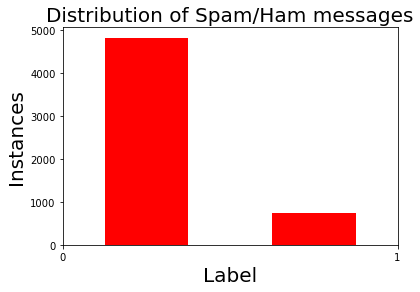

In [68]:
fig,ax = plt.subplots()

ax.hist(Y,bins=[0,0.5,1], color='r', rwidth=0.5)
ax.set_xlabel('Label',fontsize = 20)
ax.set_ylabel('Instances', fontsize = 20)
ax.set_title('Distribution of Spam/Ham messages',fontsize = 20)
ax.set_facecolor('white')
ax.set_xticks(np.arange(0,2,1))

plt.savefig('images/distribution_spam_ham.png', format='png', transparent=True)
plt.show()

In [69]:
#Split the dataset into training set and test set (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.3,random_state = 0)

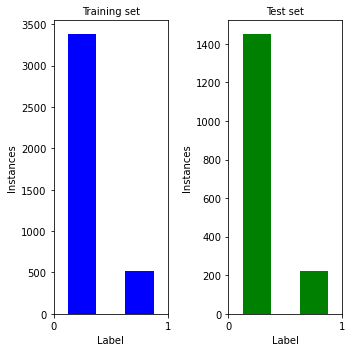

In [70]:
fig,ax = plt.subplots(1,2,figsize=(5,5))

ax[0].hist(y_train,bins=[0,0.5,1], color='b', rwidth=0.5)
ax[0].set_xlabel('Label',fontsize = 10)
ax[0].set_ylabel('Instances', fontsize = 10)
ax[0].set_title('Training set', fontsize = 10)
ax[0].set_xticks(np.arange(0,2,1))

ax[1].hist(y_test,bins=[0,0.5,1], color='g', rwidth=0.5)
ax[1].set_xlabel('Label',fontsize = 10)
ax[1].set_ylabel('Instances', fontsize = 10)
ax[1].set_title('Test set',fontsize = 10)
ax[1].set_xticks(np.arange(0,2,1))

plt.savefig('images/training_and_test_set_distribution.png', format='png', transparent=True)

plt.tight_layout()
plt.show()

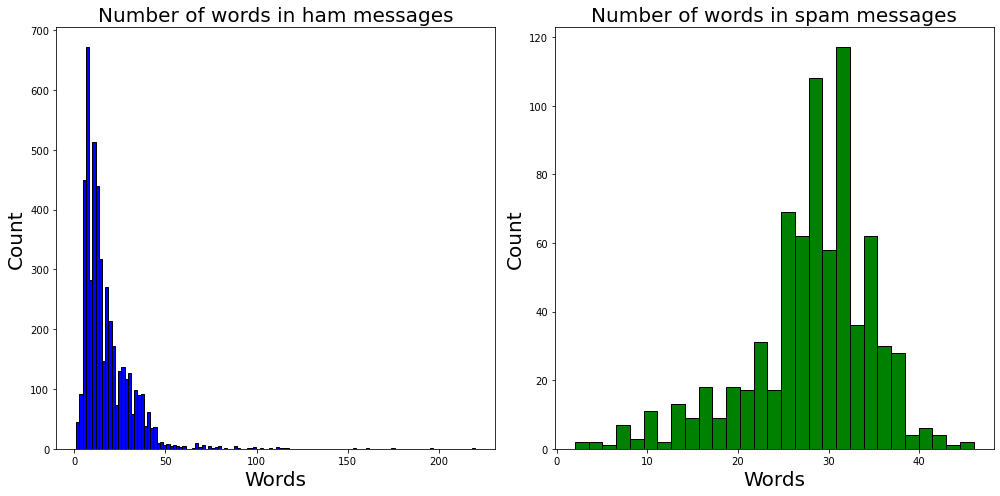

In [71]:
#Analysis of the distribution of words in ham and in spam messages
fig,ax = plt.subplots(1,2,figsize=(14,7))

ax[0].hist(df[df['Labels']==0].Words, color = 'b',bins ='auto',ec='black')
ax[0].set_title('Number of words in ham messages',fontsize = 20)
ax[0].set_xlabel('Words',fontsize = 20)
ax[0].set_ylabel('Count',fontsize = 20)

ax[1].hist(df[df['Labels']==1].Words, color = 'g',bins ='auto',ec='black')
ax[1].set_title('Number of words in spam messages',fontsize = 20)
ax[1].set_xlabel('Words',fontsize = 20)
ax[1].set_ylabel('Count',fontsize = 20)

plt.savefig('images/words_distribution.png', format='png', transparent=True)

plt.tight_layout()
plt.show()

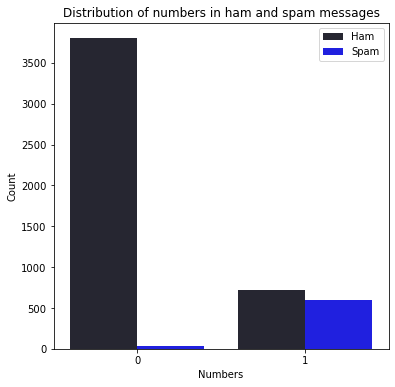

In [108]:
#Analysis of the distribution of numbers in ham and spam messages
plt.figure(figsize = (6,6))
sns.countplot(x='Numbers',data=df, hue='Labels',palette="dark:b")
plt.title('Distribution of numbers in ham and spam messages')
plt.ylabel('Count')
plt.legend(labels=['Ham','Spam'])

plt.savefig('images/numbers_distribution.png', format='png', transparent=True)
plt.show()

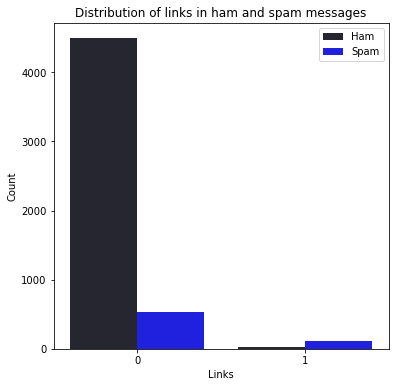

In [109]:
#Analysis of distribution of links in ham and spam messages
plt.figure(figsize = (6,6))
sns.countplot(x='Links',data=df, hue='Labels',palette="dark:b")
plt.title('Distribution of links in ham and spam messages')
plt.ylabel('Count')
plt.legend(labels=['Ham','Spam'])

plt.savefig('images/links_distribution.png', format='png', transparent=True)
plt.show()

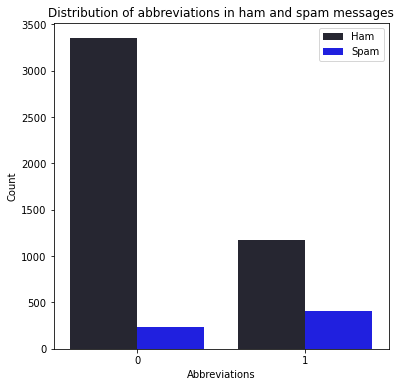

In [110]:
#Analysis of distribution of links in ham and spam messages
plt.figure(figsize = (6,6))
sns.countplot(x='Abbreviations',data=df, hue='Labels',palette="dark:b")
plt.title('Distribution of abbreviations in ham and spam messages')
plt.ylabel('Count')
plt.legend(labels=['Ham','Spam'])

plt.savefig('images/abbr_distribution.png', format='png', transparent=True)
plt.show()

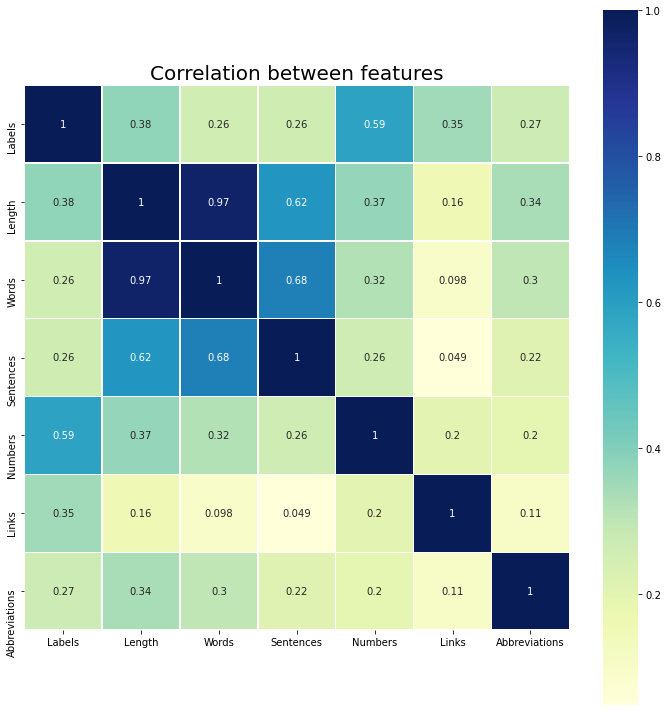

In [155]:
#Check possible correlations between features
Matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Matrix, annot=True,cmap="YlGnBu",linewidths=0.5,square = True)
plt.title('Correlation between features',fontsize = 20)

plt.savefig('images/correlation_matrix.png', format='png', transparent=True)
plt.tight_layout()
plt.show()

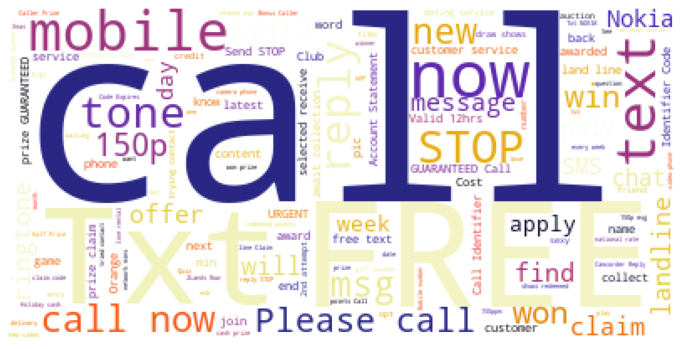

In [161]:
#Check the most frequent words in spame messages
spam_msg = df[Y==1]['SMS']

words = ''

for message in spam_msg:
    words += message

wordcloud = WordCloud(max_font_size=150, normalize_plurals=True, min_word_length=3, max_words=150, colormap='CMRmap', 
                      stopwords=set(STOPWORDS), background_color='white').generate(words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('images/word_cloud.png', format='png', transparent=True)
plt.show()

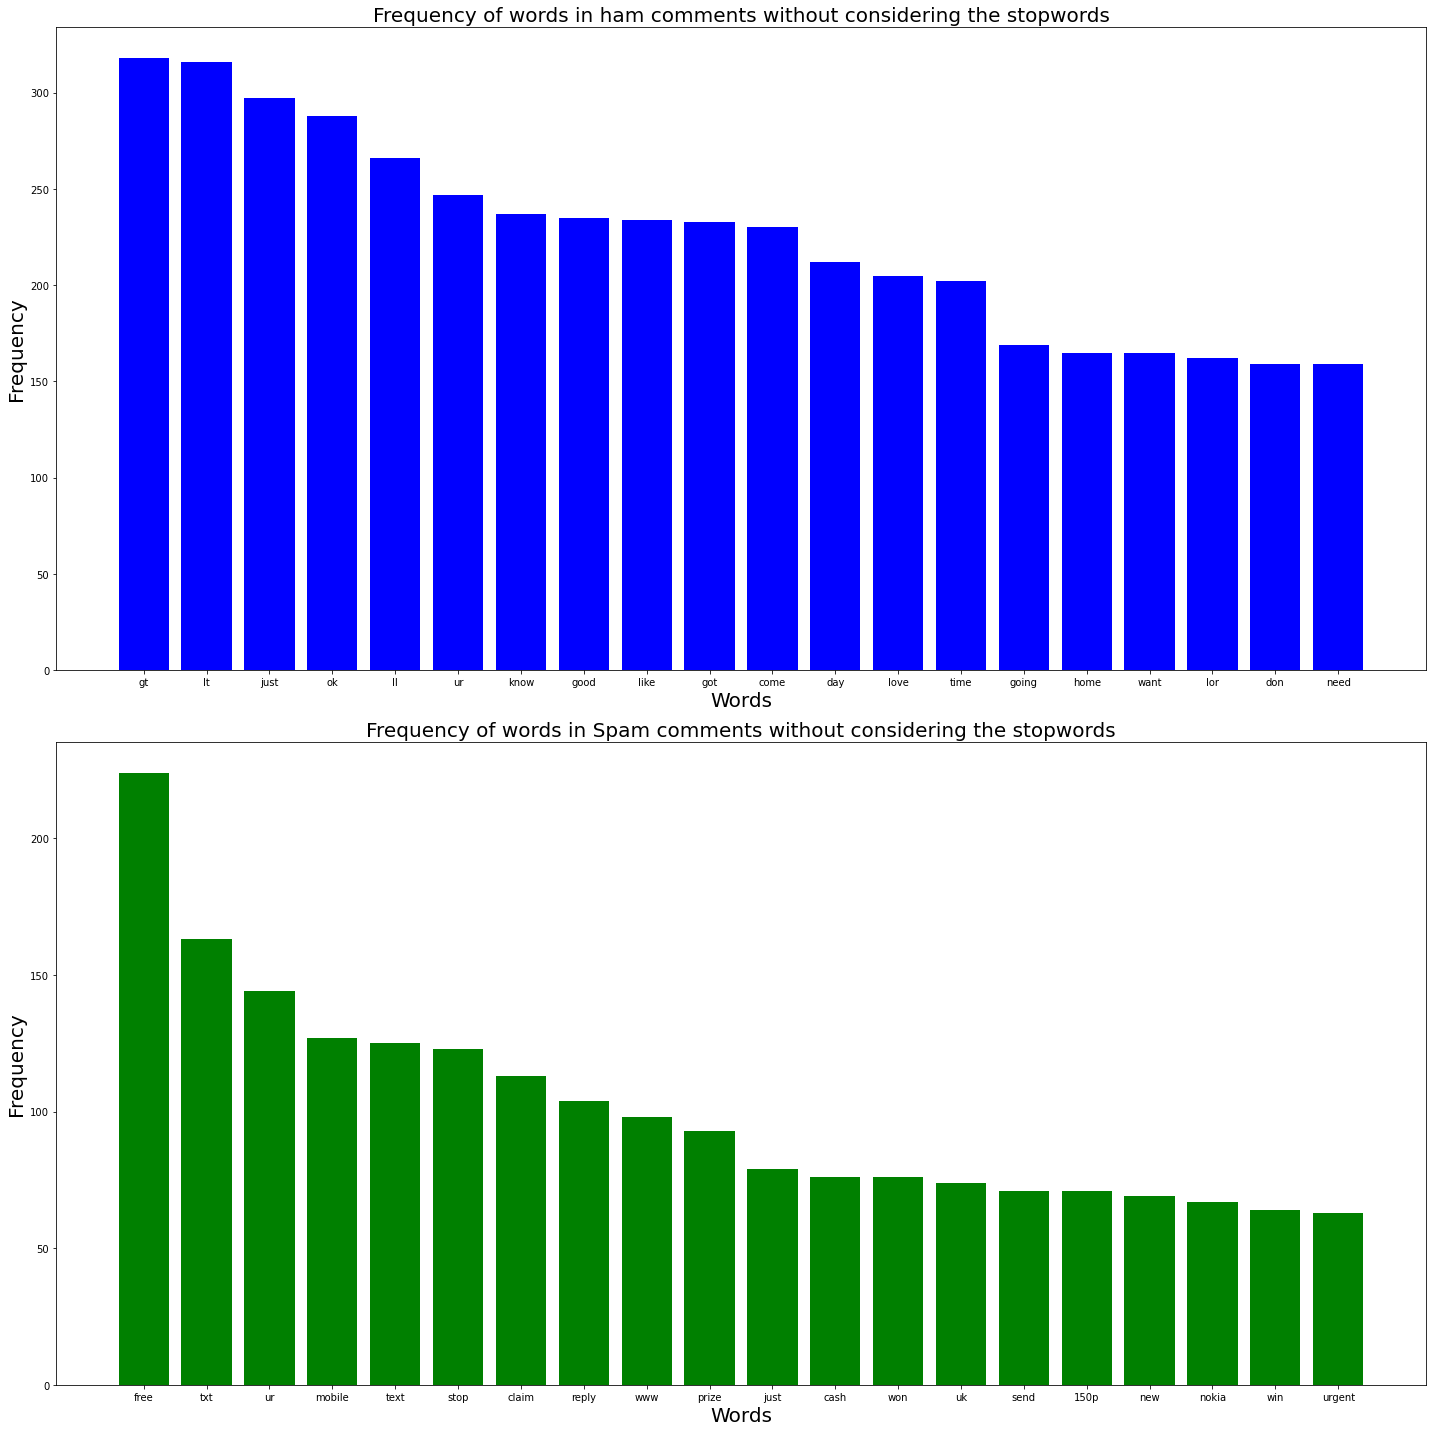

In [77]:
#Return the most frequent words in the dataset without considering the stopwords
def frequent_words(data, n):
    cv = CountVectorizer(stop_words = 'english')
    bag_of_words = cv.fit_transform(data)
    #print(bag_of_words.toarray())
    #print()
    #print(bag_of_words.shape)
    sum_bag_of_words = bag_of_words.sum(axis=0)
    #print(sum_bag_of_words)
    words_freq = [(word, sum_bag_of_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    #print (words_freq)
    words_freq.sort(key = lambda x: x[1], reverse=True)
    return words_freq[:n]


fig,ax = plt.subplots(2,figsize = (20,20))

# most frequent words in ham messages
ham_msg = df[Y==0]['SMS']
common_words = frequent_words(ham_msg, 20)
df1 = pd.DataFrame(common_words, columns = ['Ham_Msg', 'Frequency'])
df1.groupby('Ham_Msg').sum()['Frequency'].sort_values(ascending=False)
ax[0].bar(x=df1['Ham_Msg'], height=df1['Frequency'], color='blue')
ax[0].set_title('Frequency of words in ham comments without considering the stopwords',fontsize = 20)
ax[0].set_xlabel('Words',fontsize = 20)
ax[0].set_ylabel('Frequency',fontsize = 20)

# most frequent words in spam messages
spam_msg = df[Y==1]['SMS']
common_words = frequent_words(spam_msg, 20)
df1 = pd.DataFrame(common_words, columns = ['Spam_Msg', 'Frequency'])
df1.groupby('Spam_Msg').sum()['Frequency'].sort_values(ascending=False)
ax[1].bar(x=df1['Spam_Msg'], height=df1['Frequency'], color='green')
ax[1].set_title('Frequency of words in Spam comments without considering the stopwords',fontsize = 20)
ax[1].set_xlabel('Words',fontsize = 20)
ax[1].set_ylabel('Frequency',fontsize = 20)

plt.savefig('images/word_freq.png', format='png', transparent=True)
plt.tight_layout()
plt.show()
    

## *Classification and Results*

Now we use several classifiers to perform the classification. CountVectorizer is used to perform the tokenization of the messages and to remove punctuation and stopwords.

In [45]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from tabulate import tabulate

In [46]:
#Classifiers used
classifiers = [SVC(),
               MultinomialNB(),
               GaussianNB(),
               DecisionTreeClassifier(),
               LogisticRegression(),
               RandomForestClassifier()
              ]

names = [
    'SVC',
    'Multinomial Naive Bayes',
    'Gaussian Naive Bayes',
    'Decision Tree',
    'Logistic Regression',
    'Random Forest'
    ]


In [47]:
# Process a single message into stemmed tokens
def load(text):
    if not text:
        return []
    # Tokenize the message
    tokens = nltk.word_tokenize(text)

    # Remove punctuation from tokens
    tokens = [i.strip("".join(punctuations)) for i in tokens if i not in punctuations]
    # Remove stopwords and stem tokens
    if len(tokens) > 0:
        return [stemmer.stem(w) for w in tokens if w not in stopwords]
    return []

In [53]:
#Use CountVectorizer to tokenize the messages.
#The function load() is used to perform the tokenization and at the same time remove punctuation and stopwords from tokens
cv = CountVectorizer(analyzer = load)

cv_X_train = cv.fit_transform(X_train).toarray()
cv_X_test = cv.transform(X_test).toarray()

SVC
0.9936305732484076

SVC
0.8082901554404145

Multinomial Naive Bayes
0.9653179190751445

Multinomial Naive Bayes
0.8652849740932642

Gaussian Naive Bayes
0.5379746835443038

Gaussian Naive Bayes
0.8808290155440415

Decision Tree
0.8681318681318682

Decision Tree
0.8186528497409327

Logistic Regression
0.9764705882352941

Logistic Regression
0.8601036269430051

Random Forest
1.0

Random Forest
0.7668393782383419



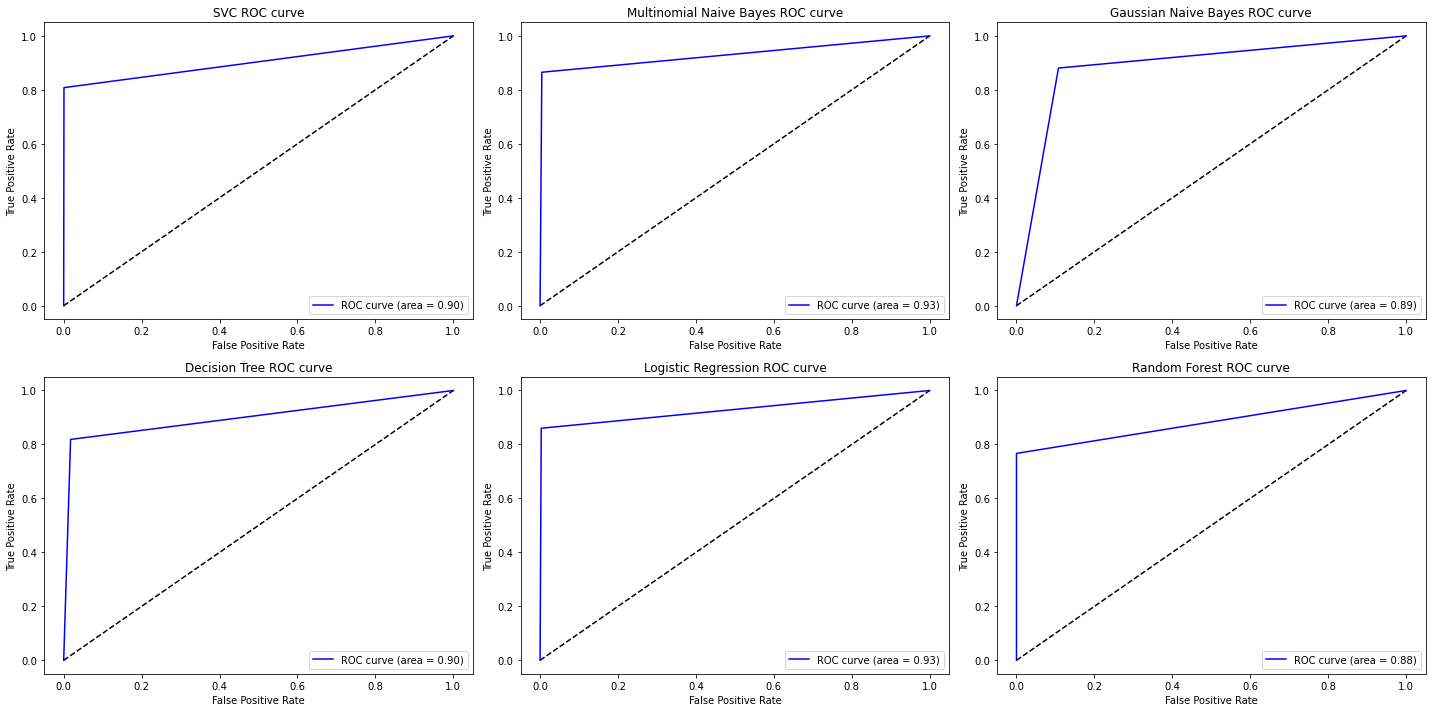

In [42]:
conf_matrix = [['Classifier','Confusion Matrix']]
accuracy_list = [['Classifier', 'Accuracy']]
precision_list = [['Classifier','Precision']]
recall_list = [['Classifier','Recall']]
f1_list = [['Classifier','F1']]

figure,ax = plt.subplots(2, 3)
figure.set_figheight(10)
figure.set_figwidth(20)
row_num = 0
col_num = 0

for name, classifier in zip(names, classifiers):
    
        classifier.fit(cv_X_train, y_train)
        predictions = classifier.predict(cv_X_test)
        matrix = confusion_matrix(y_test,predictions)
        conf_matrix.append([name,matrix])
        accuracy = format(accuracy_score(y_test,predictions))
        accuracy_list.append([name,accuracy[0:5]])
        precision = format(precision_score(y_test,predictions))
        #print(name)
        #print(precision)
        #print()
        precision_list.append([name,precision[0:5]])
        recall = format(recall_score(y_test,predictions))
        #print(name)
        #print(recall)
        #print()
        recall_list.append([name,recall[0:5]])
        f1 = format(f1_score(y_test,predictions))
        f1_list.append([name,f1[0:5]])
        
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)
        ax[row_num, col_num].plot([0, 1], [0, 1], color='black', linestyle='--')
        ax[row_num, col_num].plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
        ax[row_num, col_num].set_title(name+' ROC curve')
        ax[row_num, col_num].set_xlabel('False Positive Rate')
        ax[row_num, col_num].set_ylabel('True Positive Rate')
        ax[row_num, col_num].legend(loc='lower right')
        
        col_num += 1
        if (col_num == 3):
            col_num = 0
            row_num += 1

plt.savefig('images/roc_curve.png', format='png', transparent=True)
plt.tight_layout()
plt.show()

In [43]:
print(tabulate(conf_matrix,headers='firstrow',tablefmt='fancy_grid'))
print()
print(tabulate(accuracy_list,headers='firstrow',tablefmt='fancy_grid'))
print()
print(tabulate(precision_list,headers='firstrow',tablefmt='fancy_grid'))
print()
print(tabulate(recall_list,headers='firstrow',tablefmt='fancy_grid'))
print()
print(tabulate(f1_list,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════════╤════════════════════╕
│ Classifier              │ Confusion Matrix   │
╞═════════════════════════╪════════════════════╡
│ SVC                     │ [[1354    1]       │
│                         │  [  37  156]]      │
├─────────────────────────┼────────────────────┤
│ Multinomial Naive Bayes │ [[1349    6]       │
│                         │  [  26  167]]      │
├─────────────────────────┼────────────────────┤
│ Gaussian Naive Bayes    │ [[1209  146]       │
│                         │  [  23  170]]      │
├─────────────────────────┼────────────────────┤
│ Decision Tree           │ [[1331   24]       │
│                         │  [  35  158]]      │
├─────────────────────────┼────────────────────┤
│ Logistic Regression     │ [[1351    4]       │
│                         │  [  27  166]]      │
├─────────────────────────┼────────────────────┤
│ Random Forest           │ [[1355    0]       │
│                         │  [  45  148]]      │
╘═══════════════════

C:\Users\39349\anaconda3\lib\site-packages\tabulate\__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


In [54]:
#Use CountVectorizer for K-fold cross validation. 
#In this case it is not necessary to split the dataset in training set and test set.
#The cross-validator will do for us at each iteration.
cv_X = cv.transform(X).toarray()

In [58]:
#We use stratified cross validation to preserve the percentage of samples for each class
Skf = StratifiedKFold(n_splits = 10)

conf_matrix = [['Classifier','Confusion Matrix']]
accuracy_list = [['Classifier', 'Accuracy']]
precision_list = [['Classifier','Precision']]
recall_list = [['Classifier','Recall']]
f1_list = [['Classifier','F1']]

for name, classifier in zip(names, classifiers):
    
    predictions = cross_val_predict(classifier, cv_X, Y, cv=Skf)
    matrix = confusion_matrix(Y, predictions)
    conf_matrix.append([name,matrix])
    avg_accuracy = cross_val_score(classifier, cv_X, Y, cv=Skf, scoring='accuracy')
    accuracy_list.append([name,round(avg_accuracy.mean(),3)])
    avg_precision = cross_val_score(classifier, cv_X, Y, cv=Skf, scoring='precision_macro')
    precision_list.append([name,round(avg_precision.mean(),3)])
    avg_recall = cross_val_score(classifier, cv_X, Y, cv=Skf, scoring='recall_macro')
    recall_list.append([name,round(avg_recall.mean(),3)])
    avg_F1 = cross_val_score(classifier, cv_X, Y, cv=Skf, scoring='f1_macro')
    f1_list.append([name,round(avg_F1.mean(),3)])
    
    

In [59]:
print(tabulate(conf_matrix,headers='firstrow',tablefmt='fancy_grid'))
print()
print(tabulate(accuracy_list,headers='firstrow',tablefmt='fancy_grid'))
print()
print(tabulate(precision_list,headers='firstrow',tablefmt='fancy_grid'))
print()
print(tabulate(recall_list,headers='firstrow',tablefmt='fancy_grid'))
print()
print(tabulate(f1_list,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════════╤════════════════════╕
│ Classifier              │ Confusion Matrix   │
╞═════════════════════════╪════════════════════╡
│ SVC                     │ [[4516    2]       │
│                         │  [ 115  527]]      │
├─────────────────────────┼────────────────────┤
│ Multinomial Naive Bayes │ [[4454   64]       │
│                         │  [  49  593]]      │
├─────────────────────────┼────────────────────┤
│ Gaussian Naive Bayes    │ [[3964  554]       │
│                         │  [  75  567]]      │
├─────────────────────────┼────────────────────┤
│ Decision Tree           │ [[4441   77]       │
│                         │  [ 139  503]]      │
├─────────────────────────┼────────────────────┤
│ Logistic Regression     │ [[4508   10]       │
│                         │  [  92  550]]      │
├─────────────────────────┼────────────────────┤
│ Random Forest           │ [[4506   12]       │
│                         │  [ 134  508]]      │
╘═══════════════════

C:\Users\39349\anaconda3\lib\site-packages\tabulate\__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)
